In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc 


In [2]:
# # path to  data 
data_path = "/home/t/tandrew6/btchatch/.$SCRATCH/spatial/Kerfoot_HD_Visium/pp/SC55_probe2_long"

In [3]:
# list all files in the directory
files = os.listdir(data_path)
files 

['res_pp_SC55_probe2_long_02.h5ad',
 'pp_SC55_probe2_long_16.h5ad',
 'raw_data',
 'pp_SC55_probe2_long_08.h5ad']

In [4]:
# read data
SC55_16 = sc.read_h5ad(os.path.join(data_path, "pp_SC55_probe2_long_16.h5ad"))
raw_SC55_16 = sc.read_h5ad(os.path.join(data_path, "raw_data/raw_SC55_probe2_long_16.h5ad"))
raw_SC55_16.var_names_make_unique()

/gpfs/fs1/home/t/tandrew6/btchatch/env/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
data = raw_SC55_16 
raw_SC55_16

AnnData object with n_obs × n_vars = 149261 × 19059
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
sc.pp.filter_cells(raw_SC55_16, min_genes=5)
sc.pp.filter_genes(raw_SC55_16, min_cells=1)
sc.pp.calculate_qc_metrics(raw_SC55_16, percent_top= [500], log1p=False, inplace=True)

In [7]:
raw_SC55_16

AnnData object with n_obs × n_vars = 56379 × 16088
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'spatial'
    obsm: 'spatial'

`n_genes_by_counts`: This is the number of genes detected (i.e have at least 1 count) in each spot. A high values means that more genes where detected in that spot.
`total_counts`: The total number of counts or reads in a spot. 

/gpfs/fs1/home/t/tandrew6/btchatch/env/spatial/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


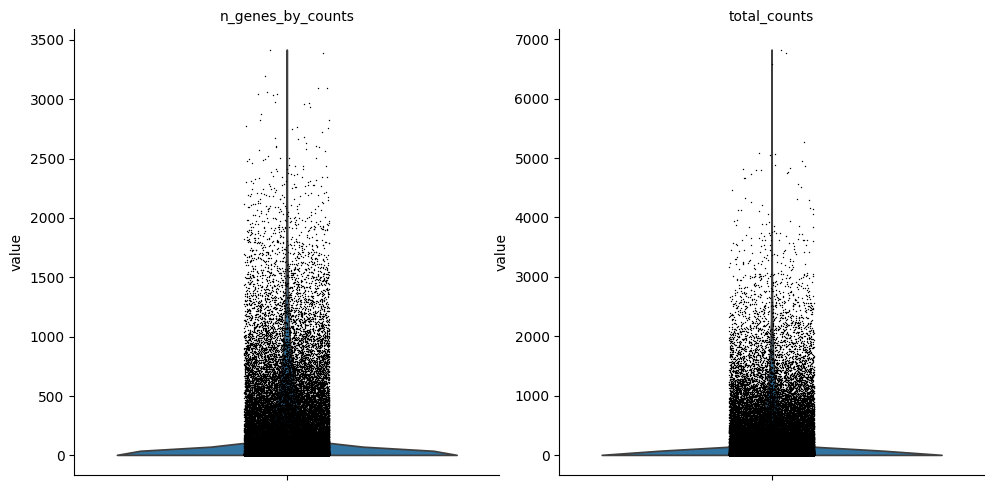

In [8]:
sc.pl.violin(raw_SC55_16, ['n_genes_by_counts', 'total_counts'],  multi_panel=True)

In [9]:
raw_SC55_16.obs['total_counts'].describe()

count    56379.000000
mean       255.282486
std        473.345123
min          5.000000
25%          8.000000
50%         28.000000
75%        299.000000
max       6824.000000
Name: total_counts, dtype: float64

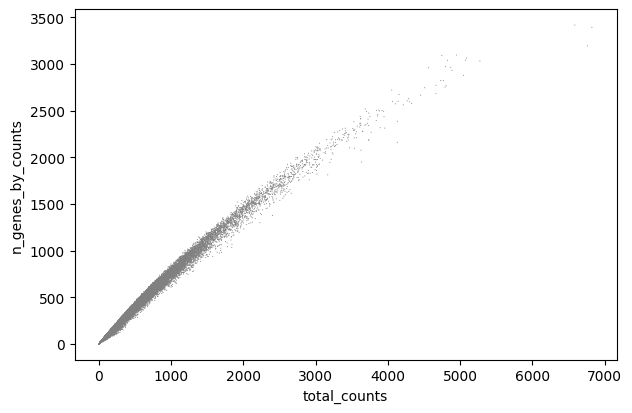

In [10]:
sc.pl.scatter(raw_SC55_16, x='total_counts', y='n_genes_by_counts')

In [11]:
sc.pp.highly_variable_genes(raw_SC55_16, flavor="seurat_v3", n_top_genes=2000, inplace=True)

In [12]:
raw_SC55_16 = raw_SC55_16[:, raw_SC55_16.var.highly_variable]
sc.pp.filter_cells(raw_SC55_16, min_genes=5)
raw_SC55_16

/gpfs/fs1/home/t/tandrew6/btchatch/env/spatial/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:160: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


AnnData object with n_obs × n_vars = 29279 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg'
    obsm: 'spatial'

In [13]:
sc.pp.normalize_total(raw_SC55_16)
sc.pp.log1p(raw_SC55_16)

In [15]:
raw_SC55_16.var.highly_variable[raw_SC55_16.var.highly_variable == True]

Sox17        True
Cpa6         True
Sbspon       True
Pi15         True
Efhc1        True
             ... 
Map7d2       True
Adgrg2       True
Grpr         True
Rnf138rt1    True
mt-Cytb      True
Name: highly_variable, Length: 2000, dtype: bool

In [17]:
sc.tl.pca(raw_SC55_16, mask_var="highly_variable")

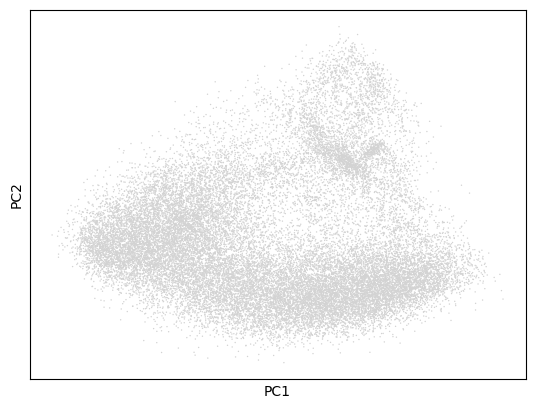

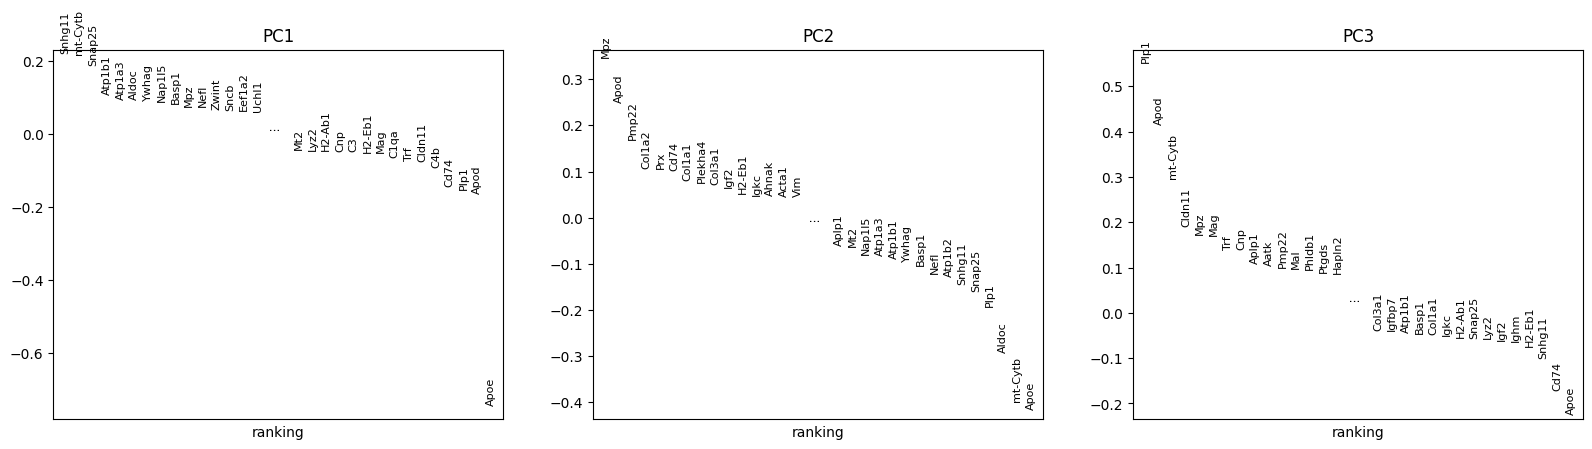

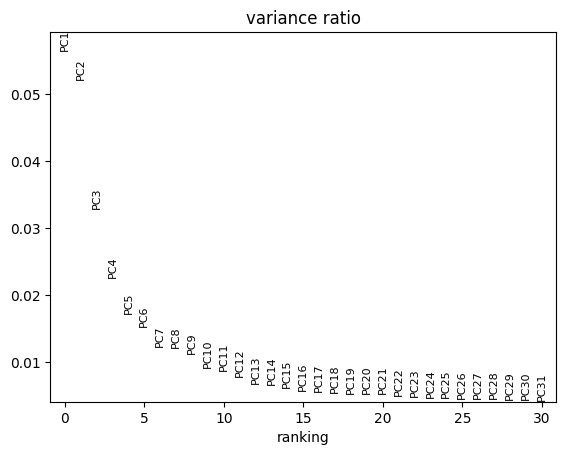

In [18]:
sc.pl.pca_overview(raw_SC55_16)

In [19]:
sc.pp.neighbors(raw_SC55_16)

In [20]:
sc.tl.umap(raw_SC55_16)

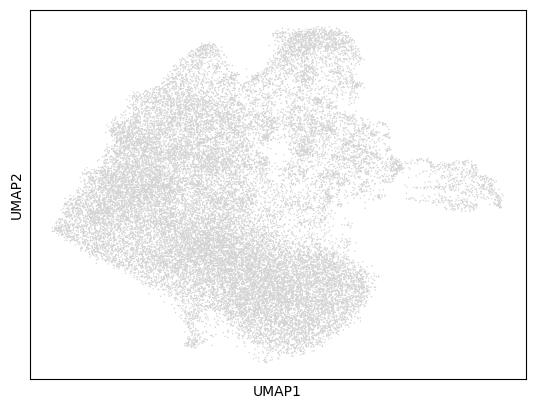

In [21]:
sc.pl.umap(raw_SC55_16)

In [22]:
sc.tl.leiden(raw_SC55_16)

/tmp/ipykernel_70734/2500926751.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(raw_SC55_16)


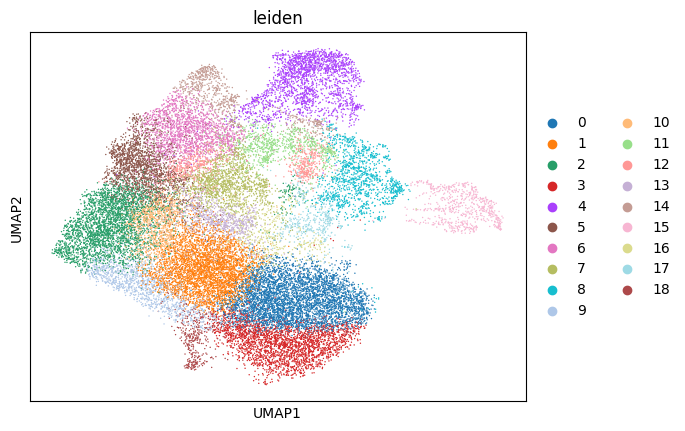

In [23]:
sc.pl.umap(raw_SC55_16, color=['leiden'])

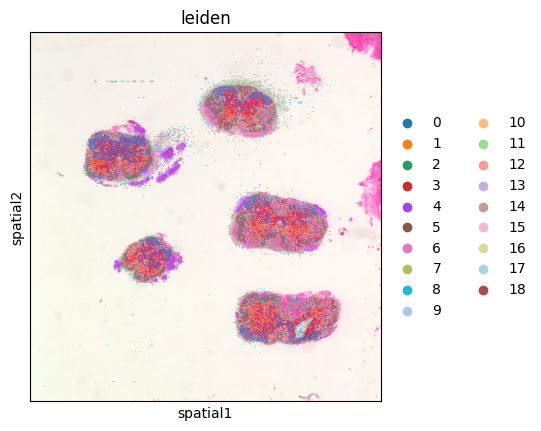

In [24]:
sc.pl.spatial(raw_SC55_16, color=['leiden'])